In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [2]:
file_path = "member.uid___A001_X2d20_X39ab.Cloverleaf_sci.spw23.cube.I.pbcor.fits-Z-profile-Region_3-Statistic_Mean-Coordinate_Current-2025-07-09-14-02-38.tsv"
df = pd.read_csv(file_path, sep="\t", skiprows=5)
df.columns = [col.strip().lstrip('#').strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors="coerce")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")

x = df[df.columns[0]]  # 第一欄為頻率
y = df[df.columns[1]]  # 第二欄為Flux Density

df[df.columns[1]] = df[df.columns[1]] * 1000  #將第二欄的值乘以1000，轉換為mJy/beam

df = df.dropna()


In [3]:
#寫出自己的線
my_lines = [
    (95.568, "CN v=0")
]

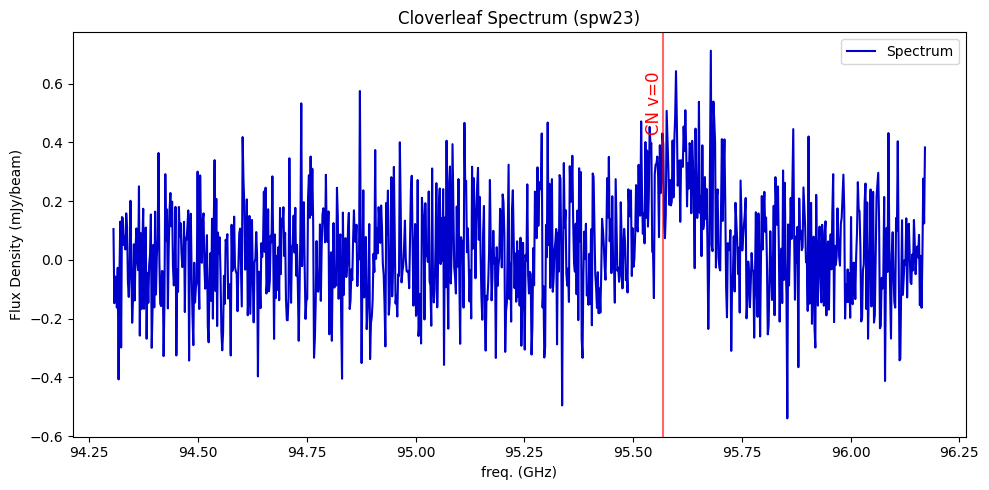

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df[df.columns[0]], df[df.columns[1]], label="Spectrum", color="mediumblue")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(df[df.columns[1]])*0.9, label, rotation=90, color="red", fontsize=12, ha='right', va='top')
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum (spw23)")
plt.grid(False)
plt.legend()      
plt.tight_layout()
plt.show()

### 先試看看boxcar

In [5]:
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(y, kernel, mode='same')

y_boxcar = boxcar_smooth(y, kernel_size=5) *1000

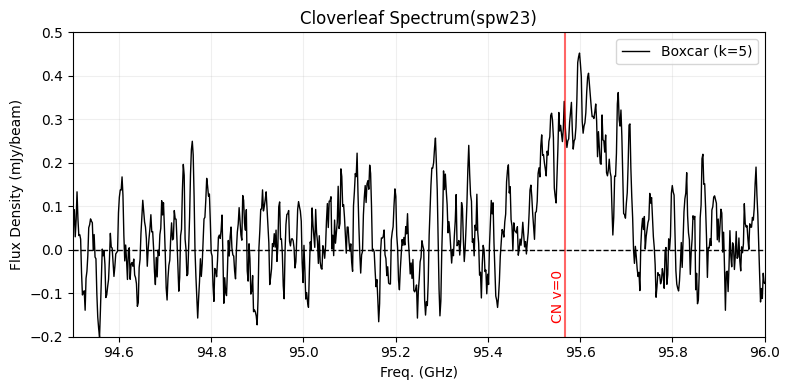

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, label="Boxcar (k=5)", color="black", linewidth=1)

for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')

plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xlim(94.5, 96.0)
plt.ylim(-0.2, 0.5)
plt.xlabel("Freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("Cloverleaf Spectrum(spw23)")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.2)
plt.show()